In [1]:
#%%
from vnpy.app.spread_trading.backtesting import BacktestingEngine
from vnpy.app.spread_trading.strategies.statistical_arbitrage_strategy import (
    StatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.base import LegData, SpreadData
from datetime import datetime

In [2]:
spread = SpreadData(
    name="Bitmex/bitstamp-Spread",
    legs=[LegData("XBTUSD.BITMEX"), LegData("btcusd.BITSTAMP")],
    price_multipliers={"XBTUSD.BITMEX": 1, "btcusd.BITSTAMP": -1},
    trading_multipliers={"XBTUSD.BITMEX": 1, "btcusd.BITSTAMP": -1},
    active_symbol="XBTUSD.BITMEX",
    inverse_contracts={"XBTUSD.BITMEX": True, "btcusd.BITSTAMP": False},
    min_volume=1
)

In [7]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    spread=spread,
    interval="1m",
    start=datetime(2019, 2, 21),
    end=datetime(2019, 6, 21),
    rate=0,
    slippage=0,
    size=1,
    pricetick=0.5,
    capital=1_000_000,
)
engine.add_strategy(StatisticalArbitrageStrategy, {})

2019-11-21 17:05:07.220886	开始加载历史数据
2019-11-21 17:05:07.221103	历史数据加载完成，数据量：166589
2019-11-21 17:05:07.456563	策略初始化完成
2019-11-21 17:05:07.456655	开始回放历史数据
2019-11-21 17:05:10.751900	历史数据回放结束
2019-11-21 17:05:10.752123	开始计算逐日盯市盈亏
2019-11-21 17:05:10.766785	逐日盯市盈亏计算完成
2019-11-21 17:05:10.767145	开始计算策略统计指标
2019-11-21 17:05:10.774501	------------------------------
2019-11-21 17:05:10.774648	首个交易日：	2019-03-03
2019-11-21 17:05:10.774664	最后交易日：	2019-06-21
2019-11-21 17:05:10.774691	总交易日：	111
2019-11-21 17:05:10.774707	盈利交易日：	68
2019-11-21 17:05:10.774722	亏损交易日：	41
2019-11-21 17:05:10.774742	起始资金：	1,000,000.00
2019-11-21 17:05:10.774759	结束资金：	1,006,435.00
2019-11-21 17:05:10.774772	总收益率：	0.64%
2019-11-21 17:05:10.774785	年化收益：	1.39%
2019-11-21 17:05:10.774797	最大回撤: 	-20,495.00
2019-11-21 17:05:10.774814	百分比最大回撤: -2.04%
2019-11-21 17:05:10.774828	最长回撤天数: 	62
2019-11-21 17:05:10.774842	总盈亏：	6,435.00
2019-11-21 17:05:10.774857	总手续费：	0.00
2019-11-21 17:05:10.774870	总滑点：	0.00
2019-11-21 17:05:10.7748

/Users/k/.pyenv/versions/3.7.0/lib/python3.7/site-packages/vnpy/app/spread_trading/backtesting.py:286: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


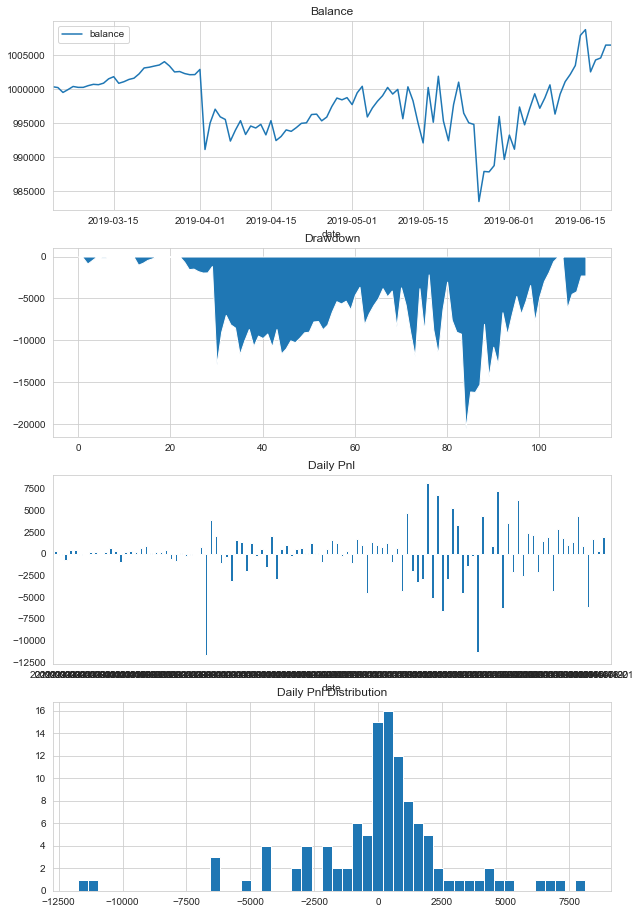

In [8]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [5]:
for trade in engine.trades.values():
    print(trade)

TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='1', tradeid='1', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=17.5, volume=10, time='00:02:00')
TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='2', tradeid='2', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=15.5, volume=10, time='00:14:00')
TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='3', tradeid='3', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=2.5, volume=10, time='00:22:00')
TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='4', tradeid='4', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=2.5, volume=10, time='00:41:00')
TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', e

TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='8479', tradeid='1924', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=168.0, volume=10, time='01:41:00')
TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='8480', tradeid='1925', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=151.0, volume=10, time='01:58:00')
TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='8481', tradeid='1926', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=168.0, volume=10, time='02:05:00')
TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='8482', tradeid='1927', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=197.0, volume=10, time='02:10:00')
TradeData(gateway_name='BACKTESTING', sym

TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='14153', tradeid='3517', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=147.5, volume=10, time='01:22:00')
TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='14154', tradeid='3518', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=152.5, volume=10, time='01:37:00')
TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='14155', tradeid='3519', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=160.5, volume=10, time='01:41:00')
TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='14156', tradeid='3520', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=142.5, volume=10, time='01:49:00')
TradeData(gateway_name='BACKTESTING', 

TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='20923', tradeid='5047', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=15.5, volume=10, time='18:00:00')
TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='20924', tradeid='5048', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=51.5, volume=10, time='18:09:00')
TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='20925', tradeid='5049', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=45.0, volume=10, time='18:10:00')
TradeData(gateway_name='BACKTESTING', symbol='Bitmex/bitstamp-Spread', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='20926', tradeid='5050', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=24.5, volume=10, time='18:16:00')
TradeData(gateway_name='BACKTESTING', symb